**Import libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load data**

In [5]:
data=pd.read_csv(r"D:\Data Analysis\Student Performance\student_data.csv")

**Data cleaning**

In [6]:
# List of unnecessary columns to drop 
columns_to_drop = [
    'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 
    'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 
    'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'
]

# Drop the columns
data = data.drop(columns=columns_to_drop)

In [7]:
data = data.rename(columns={'sex': 'Gender'})

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   school    395 non-null    object
 1   Gender    395 non-null    object
 2   age       395 non-null    int64 
 3   address   395 non-null    object
 4   famsize   395 non-null    object
 5   Pstatus   395 non-null    object
 6   Medu      395 non-null    int64 
 7   Fedu      395 non-null    int64 
 8   Mjob      395 non-null    object
 9   Fjob      395 non-null    object
 10  reason    395 non-null    object
 11  guardian  395 non-null    object
dtypes: int64(3), object(9)
memory usage: 37.2+ KB


<Axes: >

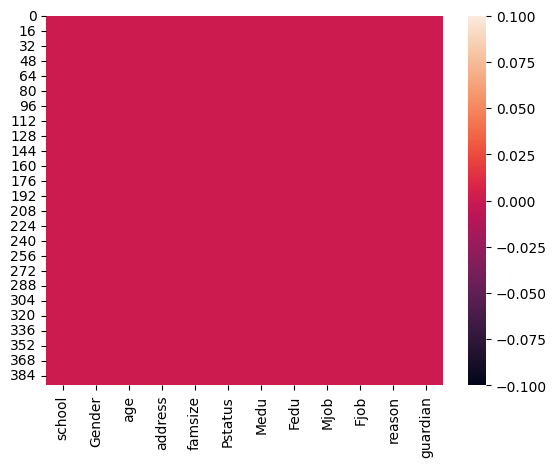

In [9]:
sns.heatmap(data.isna())    # no missing value

In [10]:
data.describe()

,age,Medu,Fedu
count,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519
std,1.276043,1.094735,1.088201
min,15.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000
50%,17.000000,3.000000,2.000000
75%,18.000000,4.000000,3.000000
max,22.000000,4.000000,4.000000


In [11]:
data.head(5)

,school,Gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother
4,GP,F,16,U,GT3,T,3,3,other,other,home,father


**Data visualization**

C:\Users\computer store\AppData\Local\Temp\ipykernel_24184\396125617.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, ax=axes[i], palette="coolwarm")
C:\Users\computer store\AppData\Local\Temp\ipykernel_24184\396125617.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)
C:\Users\computer store\AppData\Local\Temp\ipykernel_24184\396125617.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, ax=axes[i], palette="coolwarm")
C:\Users\computer store\AppData\Local\Temp\ipykernel_24184\396125617.py:11: U

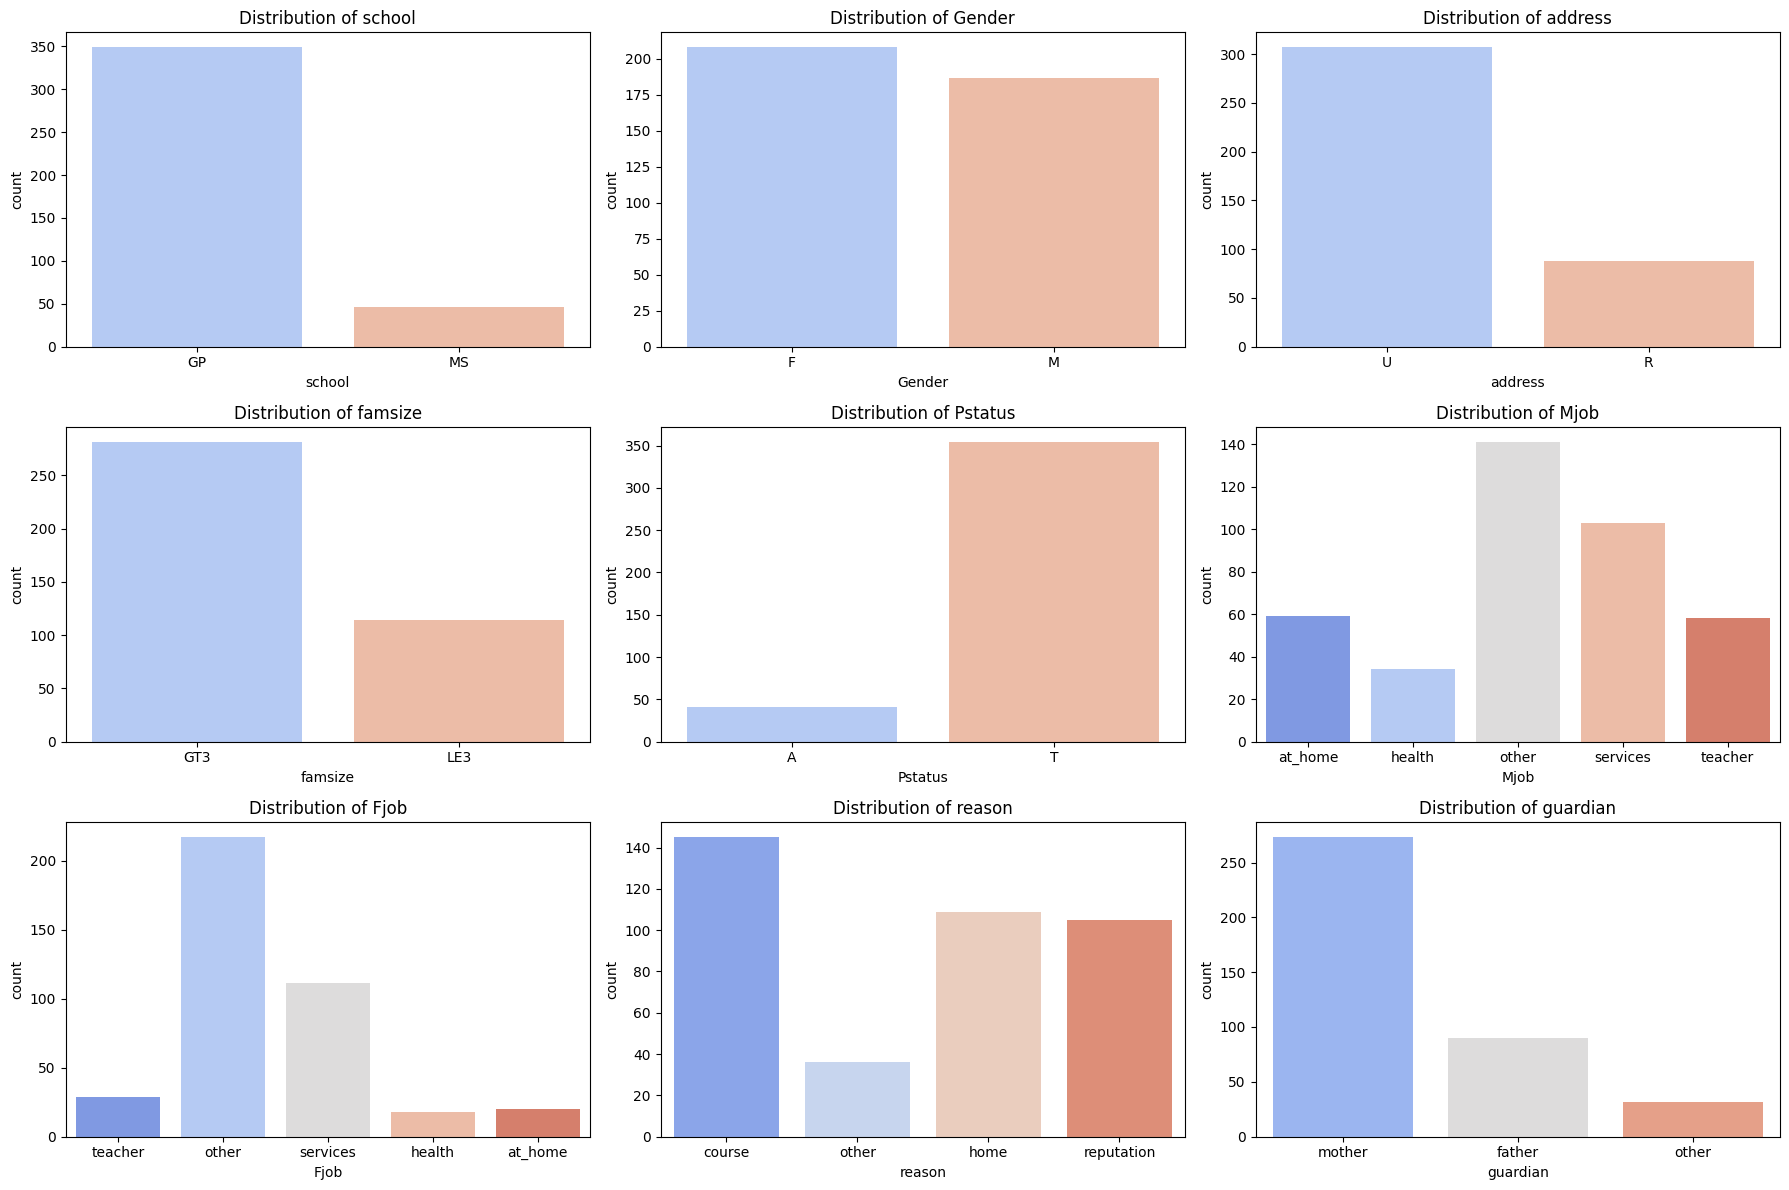

In [12]:
# List of categorical columns
categorical_columns = ['school', 'Gender', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    sns.countplot(data=data, x=column, ax=axes[i], palette="coolwarm")
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)

# Adjust layout
plt.tight_layout()
plt.show()

**How many males are 15 years old?**

In [13]:
data[(data["Gender"]=='M') & (data['age']==15)].duplicated().count()

44

**How many females are 15 years old?**

In [14]:
data[(data["Gender"]=='F') & (data['age']==15)].duplicated().count()

38

**How many females are less than or equal to 18?**

In [15]:
data[(data["Gender"]=='F') & (data['age']<=18)].duplicated().count()

193

**Show students whose mothers work at home and whose mother is their guardian**

In [16]:
data[(data["Mjob"]=='at_home') & (data['guardian']=='mother')]

,school,Gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother
39,GP,F,15,R,GT3,T,2,2,at_home,other,reputation,mother
79,GP,F,16,U,GT3,T,3,4,at_home,other,course,mother
86,GP,F,16,U,LE3,T,2,2,at_home,other,course,mother
95,GP,F,15,R,GT3,T,1,1,at_home,other,home,mother
112,GP,F,16,U,GT3,T,2,2,at_home,other,home,mother
120,GP,F,15,U,GT3,T,1,2,at_home,services,course,mother
131,GP,F,15,U,GT3,T,1,1,at_home,other,course,mother
134,GP,M,15,R,GT3,T,3,4,at_home,teacher,course,mother


**How many students have stay-at-home mothers and their mother is their guardian?**

In [17]:
data[(data["Mjob"]=='at_home') & (data['guardian']=='mother')].duplicated().count()

43

**How many students have pstatus is A and their mothers job is at home**

In [18]:
data[(data["Pstatus"]=='A') & (data['Mjob']=='at_home')].duplicated().count()

3

**Show students have pstatus is A and their mothers job is at home**

In [19]:
data[(data["Pstatus"]=='A') & (data['Mjob']=='at_home')]

,school,Gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother
343,GP,F,17,U,GT3,A,2,2,at_home,at_home,home,father
360,MS,F,18,R,LE3,A,1,4,at_home,other,course,mother


**show students have Mother edu greater than 2 and Father edu greater than 2**  

In [20]:
data[(data["Medu"]>2) & (data['Fedu']>2)]

,school,Gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother
4,GP,F,16,U,GT3,T,3,3,other,other,home,father
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother
...,...,...,...,...,...,...,...,...,...,...,...,...
374,MS,F,18,R,LE3,T,4,4,other,other,reputation,mother
377,MS,F,18,R,LE3,T,4,4,teacher,services,course,mother
378,MS,F,18,U,GT3,T,3,3,other,other,home,mother
380,MS,M,18,U,GT3,T,4,4,teacher,teacher,home,father


**The most value It was repeated**

In [21]:
data['Gender'].mode()[0]   

'F'

In [22]:
data['address'].mode()[0]

'U'

**The 5 most frequent values**

In [23]:
data['age'].value_counts()[:5]  

age
16    104
17     98
18     82
15     82
19     24
Name: count, dtype: int64

**Show students have school type is Gp and address is Rural addresses**

In [24]:
data[(data["school"]=='GP') & (data['address']=='R')]

,school,Gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
24,GP,F,15,R,GT3,T,2,4,services,health,course,mother
32,GP,M,15,R,GT3,T,4,3,teacher,at_home,course,mother
37,GP,M,16,R,GT3,A,4,4,other,teacher,reputation,mother
38,GP,F,15,R,GT3,T,3,4,services,health,course,mother
39,GP,F,15,R,GT3,T,2,2,at_home,other,reputation,mother
...,...,...,...,...,...,...,...,...,...,...,...,...
331,GP,F,17,R,GT3,T,2,4,at_home,other,course,father
334,GP,F,18,R,GT3,T,2,2,at_home,other,course,mother
336,GP,F,19,R,GT3,A,3,1,services,at_home,home,other
339,GP,F,17,R,GT3,A,3,2,other,other,home,mother


**How many students have school type is Gp and address is Rural addresses?**

In [25]:
data[(data["school"]=='GP') & (data['address']=='R')].duplicated().count()

63